In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
import folium
import json
from glob import glob
import missingno as msno

In [2]:
# merge data 불러오기
df = pd.read_csv('./datas/industry_merged.csv', encoding='utf-8')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104


In [3]:
# data 확인
df.columns

Index(['산업분류', '년도', '회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)',
       '경상이익 (백만원)', '매출액증가율 (%)', '매출액이익률 (%)', '납입자본이익률 (%)', '매출액경상이익률 (%)',
       '자기자본이익률 (%)', '총자본경상이익률 (%)', '시장규모', '시총'],
      dtype='object')

In [4]:
df['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학', '제조업'], dtype=object)

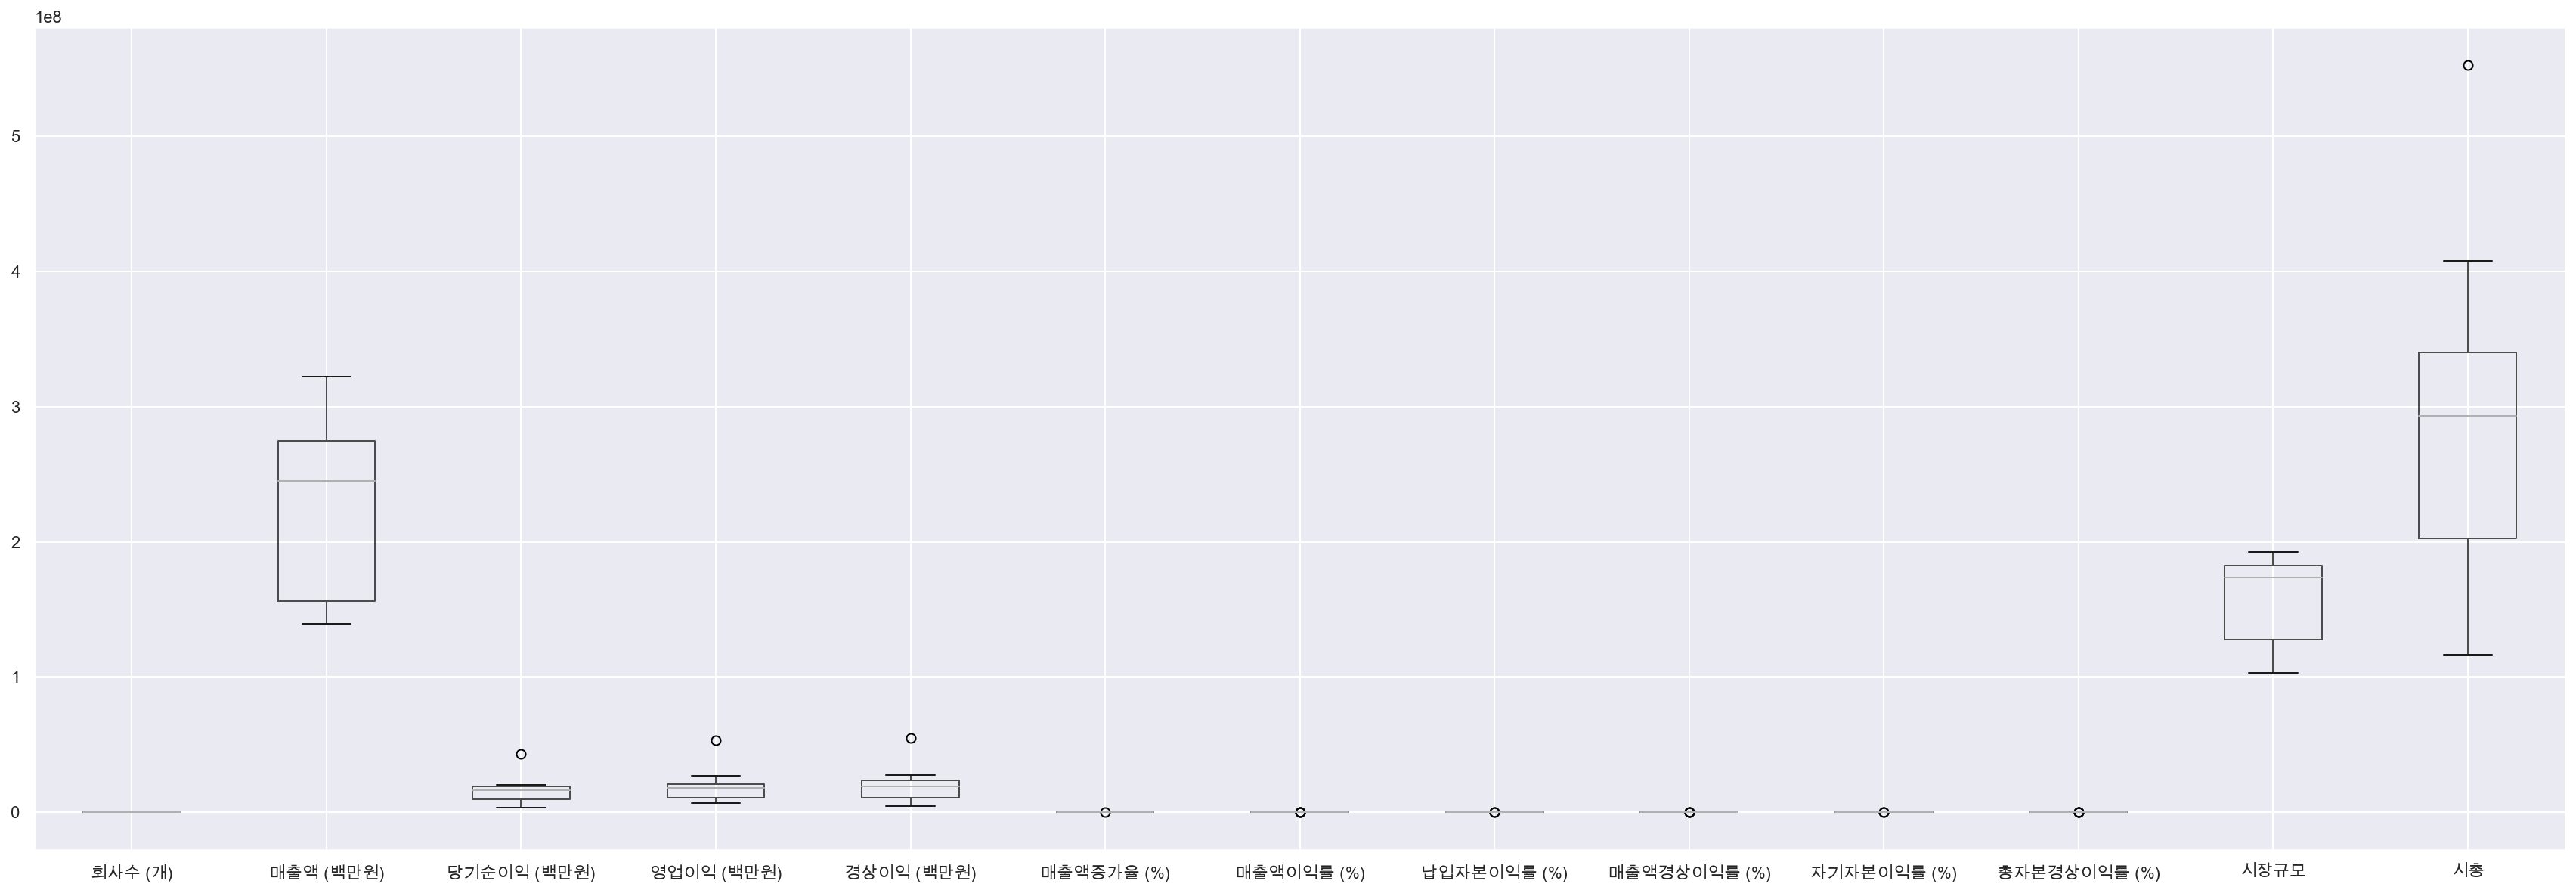

In [5]:
df[df['산업분류']=='전기전자'].boxplot(column=list(df.columns)[2:], figsize=(30,10))
plt.show()

In [6]:
# data 정규화 : standardization
# 1. 단일 산업 정규화
# 1-1. left(산업분류, 년도) - data(정규화 대상 data) 분리
df_norm_std_left_0 = df[['산업분류', '년도']][df['산업분류']=='건설업']
df_norm_std_left_0

,산업분류,년도
0,건설업,2005
1,건설업,2006
2,건설업,2007
3,건설업,2008
4,건설업,2009
5,건설업,2010
6,건설업,2011
7,건설업,2012
8,건설업,2013
9,건설업,2014


In [7]:
data_0 = df[df['산업분류'] == df['산업분류'].unique()[0]][list(df.columns)[2:]]
data_0

,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104
5,55,67304651,-697197,3039777,-300404,9.855,0.125,4.650,0.990,1.030,1.430,179833579,34691829
6,57,66947521,-405004,1649175,-368190,-3.165,-1.045,-12.480,-0.990,-3.085,-1.025,181179685,28094386
7,59,65370539,-748662,1185826,-414792,-1.450,-3.000,-33.220,-2.390,-10.285,-2.730,180753440,26801615
8,57,66066321,-1863751,376531,-1627560,-10.630,-2.895,-27.975,-2.715,-7.290,-2.640,190336161,26030658
9,54,63423849,-2785079,-1001063,-3089626,-2.295,-1.420,-7.310,-1.230,-3.455,-0.440,193740601,23499180


In [8]:
# 1-2. standardization 정규화
data_norm_0 = (data_0 - data_0.mean()) / data_0.std()
data_norm_0

,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363
1,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515
2,0.881405,-1.307870,1.277530,0.907893,1.216305,0.004754,1.158666,0.925987,1.119361,1.041482,0.959357,-0.782831,3.089481
3,0.406802,-0.745983,1.485602,0.982775,1.591530,1.438305,0.903774,0.877722,0.992318,0.834101,0.698444,-0.429057,-0.789891
4,-0.067800,0.078639,0.753429,0.781592,0.801649,1.725894,0.275041,0.412212,0.241224,0.320557,0.076267,-0.243099,0.348886
5,-0.067800,0.599326,-0.574793,0.539391,-0.539185,0.606306,-0.453950,-0.343076,-0.431690,-0.298968,-0.384010,-0.450463,0.704350
6,0.881405,0.564343,-0.420133,-0.434350,-0.568796,-1.028809,-0.851582,-0.981520,-0.984539,-0.837372,-1.040976,-0.416415,-0.114567
7,1.830610,0.409870,-0.602034,-0.758801,-0.589152,-0.813431,-1.516000,-1.754512,-1.375443,-1.779416,-1.497239,-0.427197,-0.275034
8,0.881405,0.478025,-1.192261,-1.325493,-1.118916,-1.966299,-1.480315,-1.559028,-1.466189,-1.387552,-1.473155,-0.184814,-0.370730
9,-0.542403,0.219182,-1.679929,-2.290125,-1.757579,-0.919550,-0.979028,-0.788831,-1.051552,-0.885783,-0.884428,-0.098704,-0.684953


In [9]:
# 1-3. left - 정규화data 합치기
pd.concat([df_norm_std_left_0, data_norm_0], axis=1)

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515
2,건설업,2007,0.881405,-1.307870,1.277530,0.907893,1.216305,0.004754,1.158666,0.925987,1.119361,1.041482,0.959357,-0.782831,3.089481
3,건설업,2008,0.406802,-0.745983,1.485602,0.982775,1.591530,1.438305,0.903774,0.877722,0.992318,0.834101,0.698444,-0.429057,-0.789891
4,건설업,2009,-0.067800,0.078639,0.753429,0.781592,0.801649,1.725894,0.275041,0.412212,0.241224,0.320557,0.076267,-0.243099,0.348886
5,건설업,2010,-0.067800,0.599326,-0.574793,0.539391,-0.539185,0.606306,-0.453950,-0.343076,-0.431690,-0.298968,-0.384010,-0.450463,0.704350
6,건설업,2011,0.881405,0.564343,-0.420133,-0.434350,-0.568796,-1.028809,-0.851582,-0.981520,-0.984539,-0.837372,-1.040976,-0.416415,-0.114567
7,건설업,2012,1.830610,0.409870,-0.602034,-0.758801,-0.589152,-0.813431,-1.516000,-1.754512,-1.375443,-1.779416,-1.497239,-0.427197,-0.275034
8,건설업,2013,0.881405,0.478025,-1.192261,-1.325493,-1.118916,-1.966299,-1.480315,-1.559028,-1.466189,-1.387552,-1.473155,-0.184814,-0.370730
9,건설업,2014,-0.542403,0.219182,-1.679929,-2.290125,-1.757579,-0.919550,-0.979028,-0.788831,-1.051552,-0.885783,-0.884428,-0.098704,-0.684953


In [12]:
# 2. 전체 산업분류 정규화
df_norm_std = pd.DataFrame()
for i in range(len(df['산업분류'].unique())):
    data = df[df['산업분류'] == df['산업분류'].unique()[i]][list(df.columns)[2:]]
    data_norm = (data - data.mean()) / data.std()
    df_norm_std_left = df[['산업분류', '년도']][df['산업분류']==df['산업분류'].unique()[i]]
    df_norm_std_ind = pd.concat([df_norm_std_left, data_norm], axis=1)
    df_norm_std = df_norm_std.append(df_norm_std_ind)
df_norm_std

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515
2,건설업,2007,0.881405,-1.307870,1.277530,0.907893,1.216305,0.004754,1.158666,0.925987,1.119361,1.041482,0.959357,-0.782831,3.089481
3,건설업,2008,0.406802,-0.745983,1.485602,0.982775,1.591530,1.438305,0.903774,0.877722,0.992318,0.834101,0.698444,-0.429057,-0.789891
4,건설업,2009,-0.067800,0.078639,0.753429,0.781592,0.801649,1.725894,0.275041,0.412212,0.241224,0.320557,0.076267,-0.243099,0.348886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,제조업,2014,0.099717,0.935564,0.339781,0.514301,0.401781,-0.887442,0.222465,0.484910,-0.054131,0.059944,-0.164553,0.727010,0.270063
290,제조업,2015,0.489310,0.810964,-0.149772,-0.149346,-0.132667,-1.010326,0.492857,0.118942,0.261961,0.208005,-0.119841,0.249961,0.520580
291,제조업,2016,1.252263,0.712139,-0.215117,-0.038503,-0.223510,-0.828489,1.235541,0.912585,1.071877,0.461301,0.504227,0.466530,0.932219
292,제조업,2017,1.430826,0.588947,0.303255,0.428149,0.327744,-0.350066,0.405144,0.624288,0.647522,-0.056133,0.151487,0.848513,1.953584


In [33]:
# 정규화 확인(산업/data column별 평균 = 0 확인)

for i in range(len(df['산업분류'].unique())):
    for j in range(2, len(list(df.columns))):
        if int(df_norm_std[df['산업분류']==df['산업분류'].unique()[i]][list(df.columns)[j]].mean()) != 0:
            print('error')

In [24]:
df_norm_std.to_csv('./datas/norm_std.csv', index=False)

In [25]:
df = pd.read_csv('./datas/norm_std.csv', encoding='utf-8')

In [26]:
df

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515
2,건설업,2007,0.881405,-1.307870,1.277530,0.907893,1.216305,0.004754,1.158666,0.925987,1.119361,1.041482,0.959357,-0.782831,3.089481
3,건설업,2008,0.406802,-0.745983,1.485602,0.982775,1.591530,1.438305,0.903774,0.877722,0.992318,0.834101,0.698444,-0.429057,-0.789891
4,건설업,2009,-0.067800,0.078639,0.753429,0.781592,0.801649,1.725894,0.275041,0.412212,0.241224,0.320557,0.076267,-0.243099,0.348886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,제조업,2014,0.099717,0.935564,0.339781,0.514301,0.401781,-0.887442,0.222465,0.484910,-0.054131,0.059944,-0.164553,0.727010,0.270063
290,제조업,2015,0.489310,0.810964,-0.149772,-0.149346,-0.132667,-1.010326,0.492857,0.118942,0.261961,0.208005,-0.119841,0.249961,0.520580
291,제조업,2016,1.252263,0.712139,-0.215117,-0.038503,-0.223510,-0.828489,1.235541,0.912585,1.071877,0.461301,0.504227,0.466530,0.932219
292,제조업,2017,1.430826,0.588947,0.303255,0.428149,0.327744,-0.350066,0.405144,0.624288,0.647522,-0.056133,0.151487,0.848513,1.953584
